In [49]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_name = next(iter(uploaded))

df_raw = pd.read_excel(file_name, header=None)

df = df_raw[0].str.split(",", expand=True)

df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

df = df.replace("NA", pd.NA)

df = df.apply(pd.to_numeric, errors="ignore")

print(df.shape)
df.head()


Saving framingham (1).xlsx to framingham (1) (3).xlsx
(4240, 16)


/tmp/ipython-input-760961560.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [50]:
import numpy as np
import pandas as pd

# Esik değer gösterimlerini NaN yaptım.
missing_values = ["NA", "NaN", "nan", "", " ", "None", "?", "NULL"]
df = df.replace(missing_values, pd.NA)

# Numeric kolonları otomatik bulup dönüştürdüm.
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

df.isna().sum()


/tmp/ipython-input-3912788852.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


,0
0,
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [51]:

print(" Veri seti boyutu (satır, kolon):", df.shape)
print("\n Kolon isimleri:")
print(df.columns.tolist())

print("\n Veri tipleri:")
print(df.dtypes)

print("\n İlk 5 gözlem:")
display(df.head())

print("\n Sayısal değişkenler için özet istatistikler:")
display(df.describe())


print("\n Her kolon için eksik değer sayısı:")
missing_counts = df.isnull().sum().sort_values(ascending=False)
display(missing_counts)

print("\n Her kolon için eksik değer oranı (%):")
missing_ratio = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
display(missing_ratio)

# İkisini tek tablo yaptım:
missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_ratio_%": missing_ratio
})
print("\n Eksik değer özeti tablo halinde:")
display(missing_df)


 Veri seti boyutu (satır, kolon): (4240, 16)

 Kolon isimleri:
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

 Veri tipleri:
0
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

 İlk 5 gözlem:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



 Sayısal değişkenler için özet istatistikler:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000



 Her kolon için eksik değer sayısı:


,0
0,
glucose,388
education,105
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
prevalentHyp,0



 Her kolon için eksik değer oranı (%):


,0
0,
glucose,9.150943
education,2.476415
BPMeds,1.250000
totChol,1.179245
cigsPerDay,0.683962
BMI,0.448113
heartRate,0.023585
male,0.000000
prevalentHyp,0.000000



 Eksik değer özeti tablo halinde:


,missing_count,missing_ratio_%
0,,
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
male,0,0.000000
prevalentHyp,0,0.000000


In [52]:

# Klinik testin eksiklerini sildim.
df = df.dropna(subset=['glucose', 'totChol', 'BMI'])

# Education'ı mode ile doldurdum.
df['education'] = df['education'].fillna(df['education'].mode()[0])

# BPMeds'i 0 ile doldurdum.
df['BPMeds'] = df['BPMeds'].fillna(0)

# sigara içmeyen bireylerde eksik değer 0 ile, sigara içen bireylerde ise median değeri kullanılarak eksik verileri doldurdum.
df.loc[(df['currentSmoker'] == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] = 0
df.loc[(df['currentSmoker'] == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] = df['cigsPerDay'].median()

# heartRate'i median ile doldurdum.
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

df.isna().sum()
df.shape



(3828, 16)

In [53]:
print(df.isna().sum())


0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


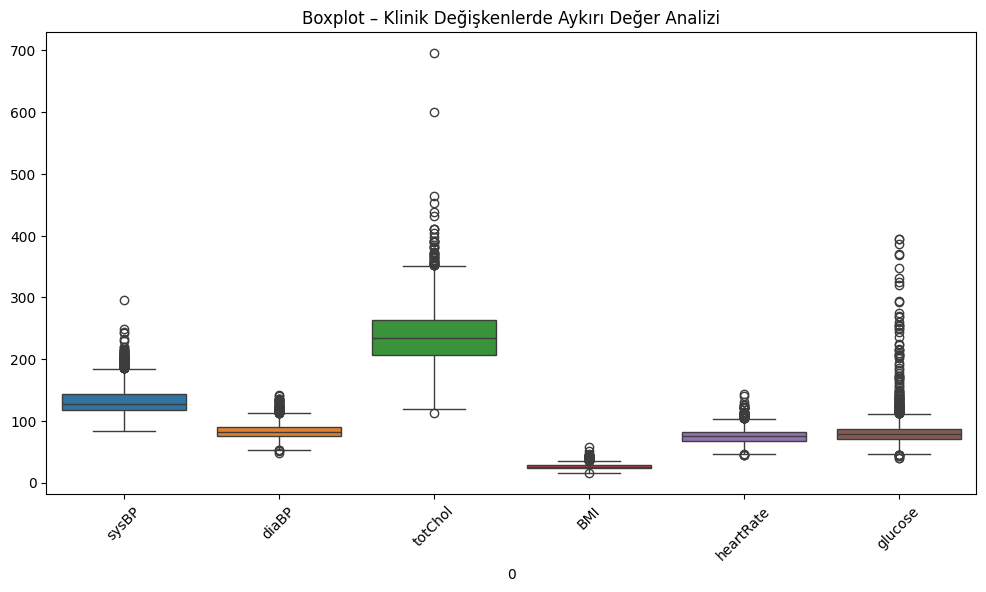

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['sysBP','diaBP','totChol','BMI','heartRate','glucose']])
plt.xticks(rotation=45)
plt.title("Boxplot – Klinik Değişkenlerde Aykırı Değer Analizi")
plt.show()


In [55]:
# Tansiyon sınıflandırma fonksiyonu tanımladım.
def classify_bp(row):
    sys_bp = row["sysBP"]
    dia_bp = row["diaBP"]

    # Hipertansiyon
    if (sys_bp >= 140) or (dia_bp >= 90):
        return 1

    # Hipotansiyon
    elif (sys_bp < 90) and (dia_bp < 60):
        return 2

    # Normal
    else:
        return 0

# Fonksiyonu DataFrame'e uyguladım yeni kolon oluşturdum.
df["bp_disorder"] = df.apply(classify_bp, axis=1)

print(df["bp_disorder"].value_counts())
print(df.columns)


bp_disorder
0    2456
1    1369
2       3
Name: count, dtype: int64
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'bp_disorder'],
      dtype='object', name=0)


Gruplara göre ortalama değerler:


,age,BMI,totChol,heartRate,sysBP,diaBP
bp_disorder,,,,,,
0,47.760179,24.870599,231.328583,74.254886,119.957655,76.797435
1,52.964207,27.497538,247.317020,78.355004,154.987582,94.069028
2,50.333333,22.376667,201.000000,87.000000,84.166667,54.666667


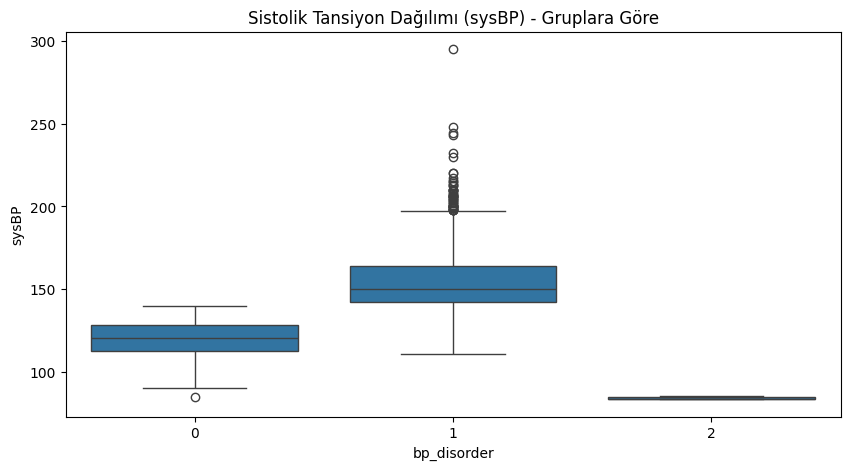

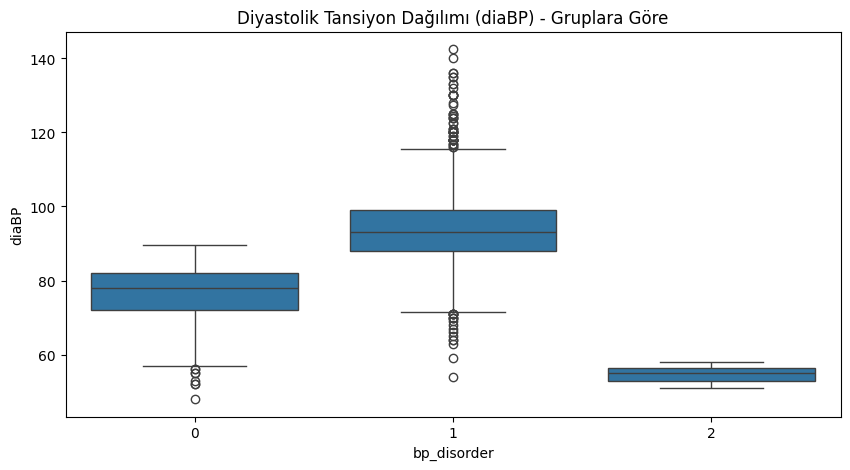

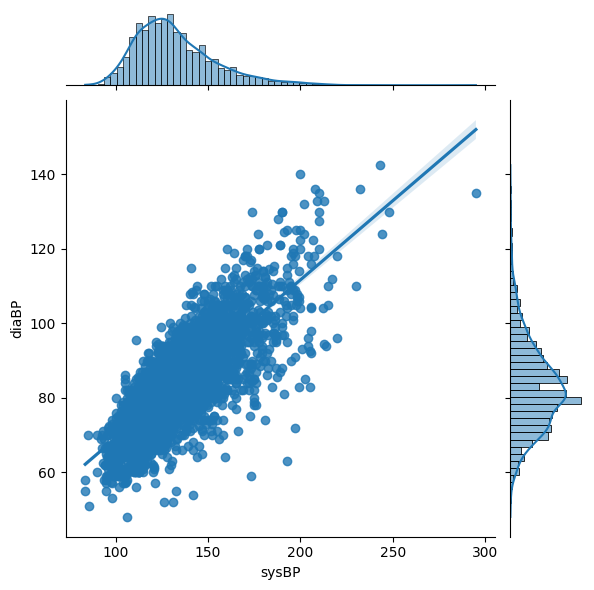

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gruplara göre ortalama değerleri buldum.
group_means = df.groupby("bp_disorder")[["age", "BMI", "totChol", "heartRate", "sysBP", "diaBP"]].mean()
print("Gruplara göre ortalama değerler:")
display(group_means)

# sysBP dağılımı
plt.figure(figsize=(10,5))
sns.boxplot(x="bp_disorder", y="sysBP", data=df)
plt.title("Sistolik Tansiyon Dağılımı (sysBP) - Gruplara Göre")
plt.show()

# diaBP dağılımı
plt.figure(figsize=(10,5))
sns.boxplot(x="bp_disorder", y="diaBP", data=df)
plt.title("Diyastolik Tansiyon Dağılımı (diaBP) - Gruplara Göre")
plt.show()

# Korelasyon (sysBP vs diaBP)
sns.jointplot(x="sysBP", y="diaBP", data=df, kind="reg", height=6)
plt.show()


In [57]:
df["BP_binary"] = df["bp_disorder"].apply(lambda x: 1 if x in [1, 2] else 0)

print(df["BP_binary"].value_counts())
print(df["BP_binary"].value_counts(normalize=True) * 100)


BP_binary
0    2456
1    1372
Name: count, dtype: int64
BP_binary
0    64.15883
1    35.84117
Name: proportion, dtype: float64


In [58]:
from sklearn.utils import resample

df_majority = df[df["BP_binary"] == 0]
df_minority = df[df["BP_binary"] == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

print(df_balanced["BP_binary"].value_counts())


BP_binary
0    2456
1    2456
Name: count, dtype: int64


In [59]:
features = [
    "age", "male", "BMI", "sysBP", "diaBP", "totChol", "heartRate",
    "glucose", "currentSmoker", "cigsPerDay", "diabetes",
    "BPMeds", "prevalentStroke", "prevalentHyp", "education"
]
target = "BP_binary"



In [60]:
from sklearn.model_selection import train_test_split

X = df_balanced[features]
y = df_balanced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Eğitim seti:", X_train.shape)
print("Test seti:", X_test.shape)


Eğitim seti: (3929, 15)
Test seti: (983, 15)


In [61]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

def evaluate_model(name, y_test, y_pred, y_proba):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))


In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

dt_clf.fit(X_train, y_train)

y_pred_dt  = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

evaluate_model("Decision Tree", y_test, y_pred_dt, y_proba_dt)



=== Decision Tree ===
Accuracy : 0.9990
Precision: 0.9980
Recall   : 1.0000
F1-score : 0.9990
ROC-AUC  : 0.9990

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       491

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred_rf  = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)



=== Random Forest ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 1.0000

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       491

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



In [64]:
!pip install xgboost


In [65]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)

y_pred_xgb  = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)



=== XGBoost ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 1.0000

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       491

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



In [66]:
import pandas as pd

results = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [0.999, 1.000, 1.000],
    "Precision": [0.998, 1.000, 1.000],
    "Recall": [1.000, 1.000, 1.000],
    "F1-score": [0.999, 1.000, 1.000],
    "ROC-AUC": [0.999, 1.000, 1.000]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Decision Tree,0.999,0.998,1.0,0.999,0.999
1,Random Forest,1.000,1.000,1.0,1.000,1.000
2,XGBoost,1.000,1.000,1.0,1.000,1.000


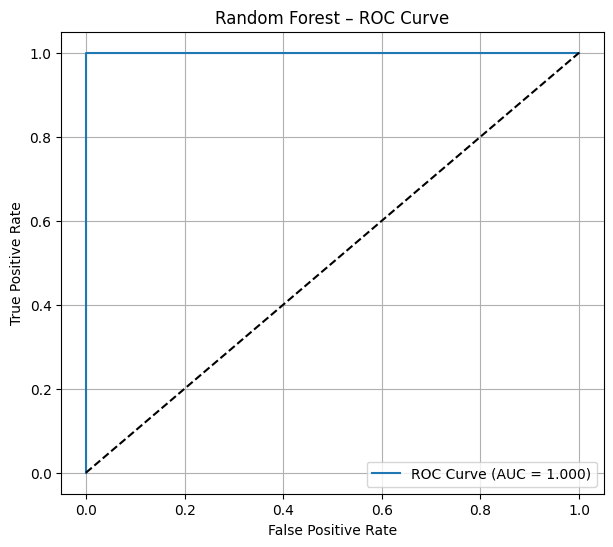

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC için pozitif sınıfın olasılıkları
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# ROC noktaları
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest – ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

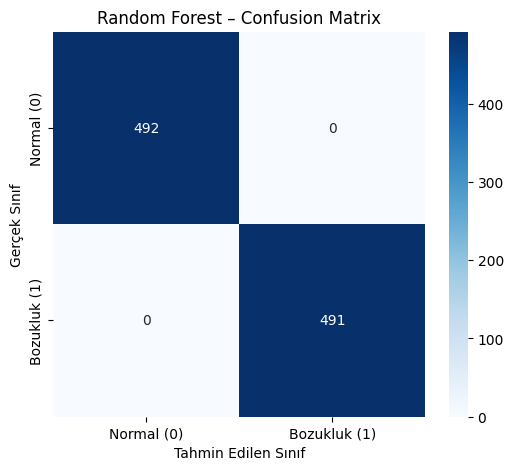

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_rf = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Bozukluk (1)"],
            yticklabels=["Normal (0)", "Bozukluk (1)"])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Random Forest – Confusion Matrix")
plt.show()


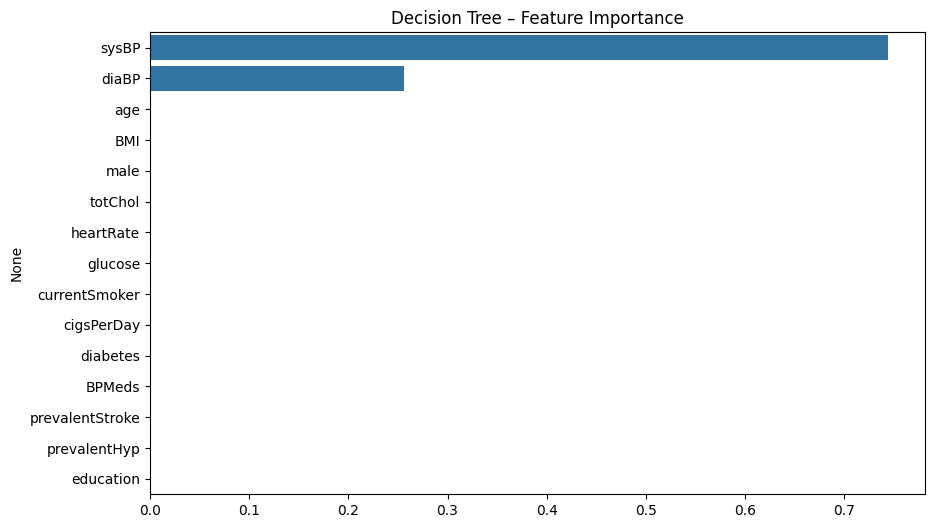

In [74]:
dt_importances = pd.Series(
    dt_clf.feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=dt_importances.values, y=dt_importances.index)
plt.title("Decision Tree – Feature Importance")
plt.show()


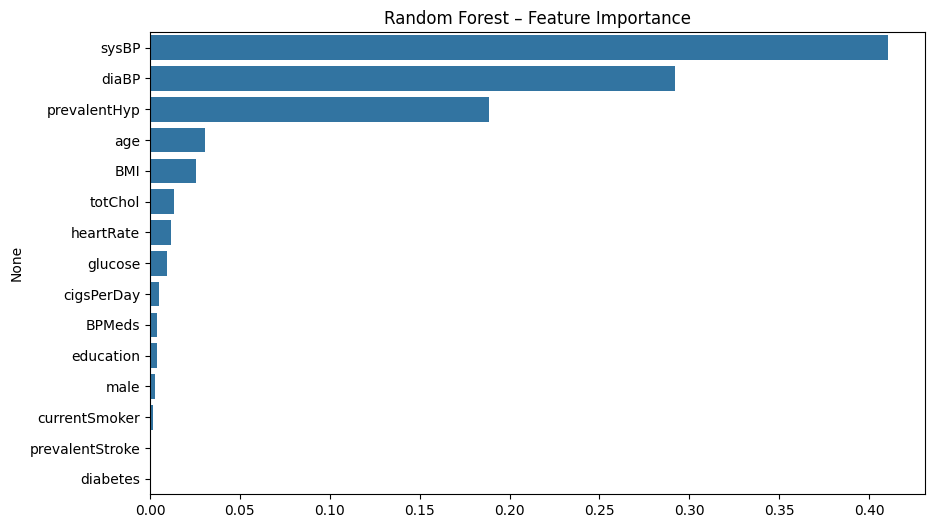

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances = pd.Series(
    rf_clf.feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("Random Forest – Feature Importance")
plt.show()


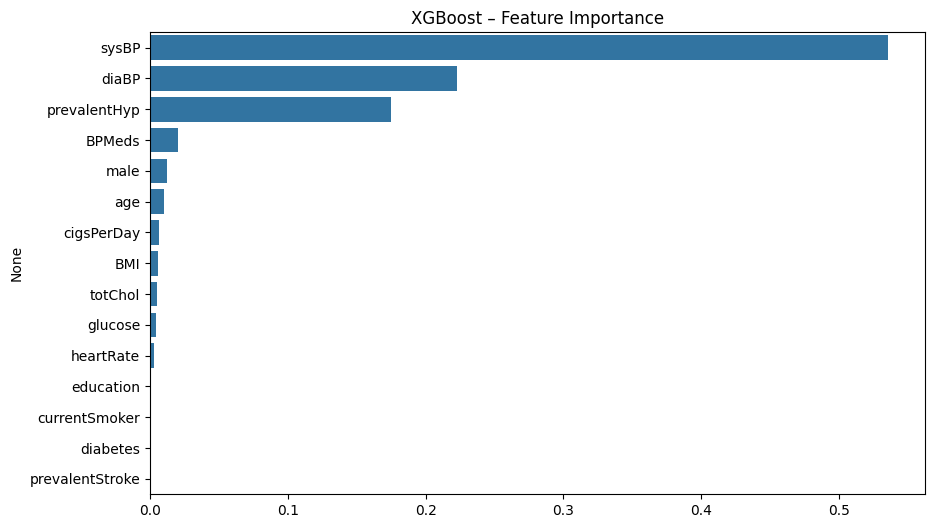

In [76]:
xgb_importances = pd.Series(
    xgb_clf.feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("XGBoost – Feature Importance")
plt.show()
